# Numerical exercise
Kristine Schüller and Sigrid Aunsmo

In [1]:
#defining constants 

h_bar=1
m=1
k_0=20
L=20
t_0=0

## problem 1

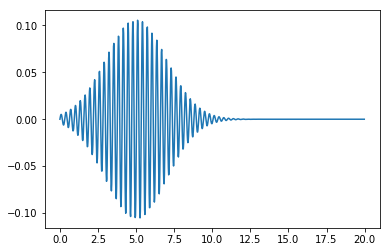

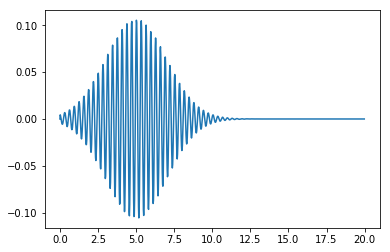

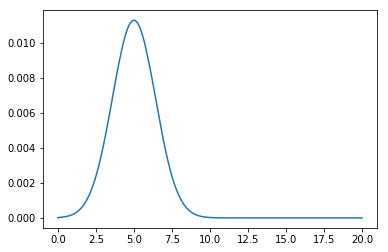

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

#for animasjon
import matplotlib.animation as animation
#%matplotlib notebook #bruke denne ved animasjon?
%matplotlib inline

sigma_x=2 #??
xs=5 #bare satte 5 fordi vi skal ha den verdien etterhvert
Nx= 1000

#finding E and omega based on forumula in text
E=(h_bar*k_0)**2/(2*m)
omega=E/h_bar


#Function to calculate imaginary part of psi
def find_psi_im(x,t):
    psi_i=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_i[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.sin(k_0*x[1:-1]-omega*t)
    psi_i=psi_i/np.linalg.norm(psi_i) #normalizing
    return psi_i

#function to calculate real part of psi 
def find_psi_re(x,t):
    psi_r=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_r[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.cos(k_0*x[1:-1]-omega*t)
    psi_r=psi_r/np.linalg.norm(psi_r) #normalizing
    return psi_r
    
#guessing a value for delta_t 
delta_t=0.00001

#defining delta_x 
"""stemmer dette? Er lengda på arrayene Nx+1??"""
delta_x= L/(Nx)    

#making a array of x-values from 0 to L
x=np.arange(0,L,delta_x)

#making arrays of initial values of psi_r(x,delta_t/2) and psi_i(x,0)
psi_i=find_psi_im(x,0)
psi_r=find_psi_re(x,delta_t/2)

#plotting
plt.plot(x,psi_i)
plt.show()

plt.plot(x,psi_r)
plt.show()

"""ettersom vi har så liten delta_t, kanskje vi kan bruke de psi-ene vi har funnet????"""
psi_squared=find_psi_im(x,0)**2+find_psi_re(x,0)**2 
psi_squared=psi_i**2+psi_r**2 
plt.plot(x,psi_squared)
plt.show()



## problem 2

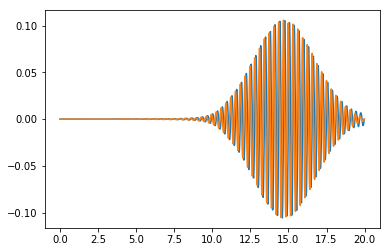

'Det ser ikke ut som den blir helt 15???'

In [3]:
%matplotlib inline

v_g=(h_bar*k_0)/m
T= L/(2*v_g)
timesteps=int(T/delta_t)

#setting the potensial to be zero 
V2=np.zeros(len(x)) 

#finding the inital values for psi_i and psi_r
psi_i=find_psi_im(x,0)
psi_r=find_psi_re(x,delta_t/2)


"""SIGRID rydd i disse to funksjonene!"""
#functions to update psi_r and psi_i
def newPsi_im(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_i=np.zeros(len(psi_i))
    #psi_i[1:-1] = psi_i[1:-1] - delta_t *((V[1:-1]/h_bar*psi_r[1:-1]) - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
    
    nextPsi_i[1:-1] = psi_i[1:-1] - delta_t *(V[1:-1]/h_bar*psi_r[1:-1] - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
    #print(psi_i[1],V[1],psi_r[2],psi_r[1],psi_r[0])
    #print(psi_i[1],V[1],psi_r[2],psi_r[1],psi_r[0])
    #psi_i=nextPsi_i
    #psi_i=psi_i/np.linalg.norm(psi_i)
    return nextPsi_i
                     
def newPsi_re(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_r=np.zeros(len(psi_r))
    #psi_r[1:-1] = psi_r[1:-1] - delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
    nextPsi_r[1:-1] = psi_r[1:-1] + delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
    #psi_r=nextPsi_r
    return nextPsi_r
    


#plt.plot(x,psi_i)
#plt.show()


#newPsi_im(psi_i,psi_r,delta_x,delta_t, V)
#psi_i=psi_i/np.linalg.norm(psi_i)
#plt.plot(x,psi_i)
#plt.show()


#plt.plot(x,psi_i)
#plt.plot(x,psi_r)
"""Kanskje se litt på å ta inn array by referance ikke copy??"""
def propagate_psi(psi_i,psi_r,timesteps,V):
    for i in range(timesteps):
        psi_i=newPsi_im(psi_i,psi_r,delta_x,delta_t, V)
        psi_r=newPsi_re(psi_i,psi_r,delta_x,delta_t, V)
    return psi_i, psi_r

    
#print(psi_i[0])  
#print(psi_i[1],psi_i[2],psi_i[-2])

psi_i, psi_r = propagate_psi(psi_i,psi_r,timesteps,V2)
    
    
plt.plot(x,psi_i)
plt.plot(x,psi_r)
plt.show()

"""Det ser ikke ut som den blir helt 15???"""


In [4]:
#plotting for different values of sigma_x
sigma_xs=[0.5,1,2]
psi_squared_list=[]
for i in range(len(sigma_xs)):
    sigma_x=sigma_xs[i]
    
    #finding initial values: 
    psi_i=find_psi_im(x,0)
    psi_r=find_psi_re(x,delta_t/2)
    
    psi_i,psi_r = propagate_psi(timesteps,psi_i,psi_r)
    
    #calculating the probability density and adding to a list such that it can be plotted later
    psi_squared_list.append(psi_i**2+psi_r**2)
       
    print("sigma_x =",sigma_x)
    plt.plot(x,psi_i)
    plt.plot(x,psi_r)
    plt.show()
    
#plotting the probability density psi_squared
plt.plot(x,psi_squared_list[0], label=r'$\psi^2$ for $\sigma_x=0.5')
plt.plot(x,psi_squared_list[1], label=r'$\psi^2$ for $\sigma_x=1')
plt.legend()
plt.show()


"""MANGLER: test for ulike verdier av delta_t og finn et passende valg"""

TypeError: propagate_psi() missing 1 required positional argument: 'V'

<IPython.core.display.Javascript object>


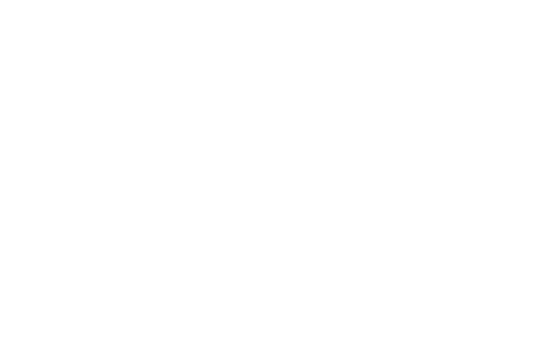

<IPython.core.display.Javascript object>


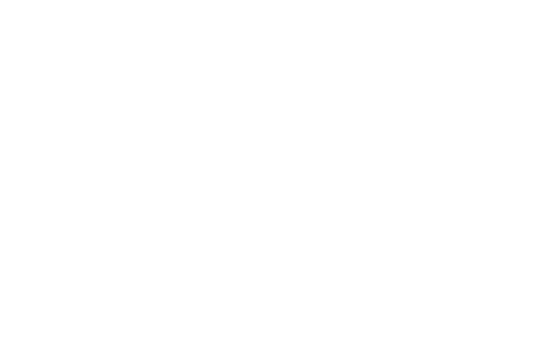

Traceback (most recent call last):
  File "C:\Users\krist\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\krist\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\krist\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [5]:
#making animation: (funker ikke enda) 
%matplotlib notebook
    
def animate_psi_im(i): 
    for i in range(10):
        psi_i=newPsi_im(psi_i,psi_r,delta_x,delta_t,V2)
        psi_r=newPsi_re(psi_i,psi_r,delta_x,delta_t,V2)
    line.set_ydata(psi_i)
    return line

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


fig, ax = plt.subplots()
line, = ax.plot(x, psi_i)
ani = animation.FuncAnimation(fig, animate_psi_im, init_func=init, frames=100, interval=20, blit=True)
plt.show()

## problem 3

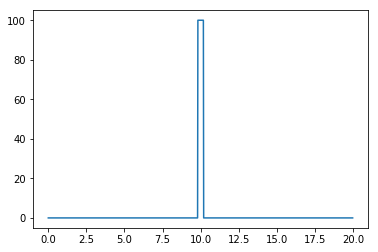

'MANGLER: \n-regn ut transmisjonssannsynligheten\n-???? er ikke potensialet vårt dritstort ift oppgaveteksten?\n'

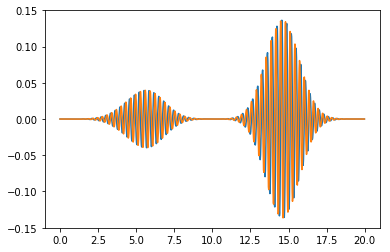

In [6]:
%matplotlib inline
E=(h_bar*k_0)**2/(2*m)
l=L/50
V_0=E/2
sigma_x=1

#defining the potential as a function of x
"""trenger vi ta inn l her?"""
def V3(x,V_0,l):
    if (L/2-l/2<x) and (L/2+l/2>x):
        return V_0
    else: 
        return 0 

#defing the potensial as an array
V3_arr= np.zeros(len(x)) #making an array of zeros
for i in range(len(x)):
    V3_arr[i]=V3(i*delta_x,V_0,l) #x=i*delta_x 

plt.plot(x,V3_arr)
plt.show()

#initial values for psi_i and psi_r: 
psi_i0=find_psi_im(x,0)
psi_r0=find_psi_re(x,delta_t/2)

psi_i, psi_r = propagate_psi(psi_i0,psi_r0,timesteps,V3_arr)

#plotting
plt.plot(x,psi_i)
plt.plot(x,psi_r)



"""MANGLER: 
-regn ut transmisjonssannsynligheten
-???? er ikke potensialet vårt dritstort ift oppgaveteksten?
"""

## problem 4

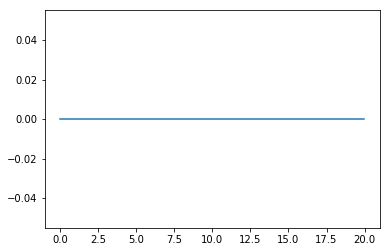

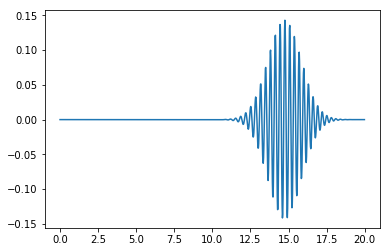

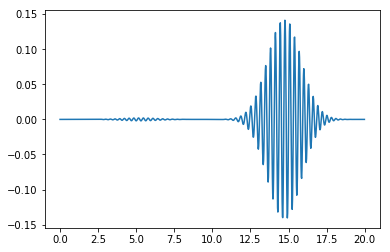

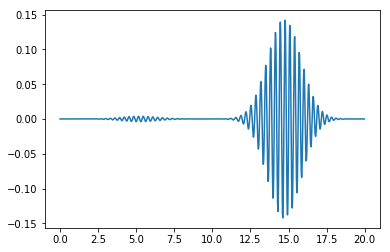

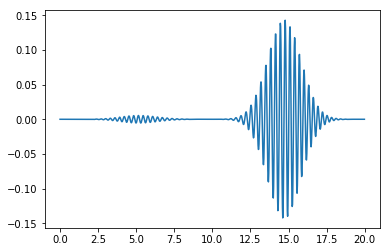

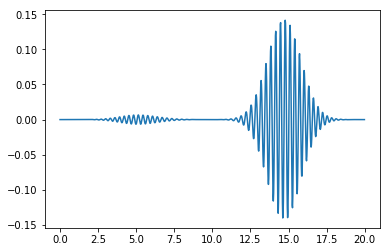

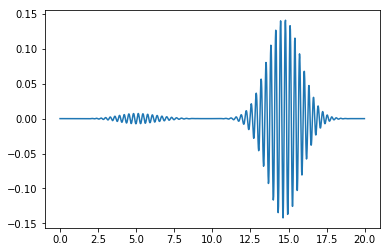

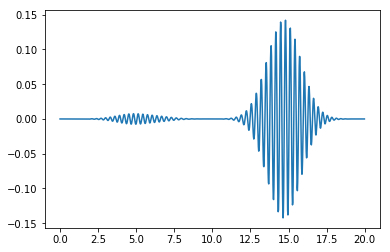

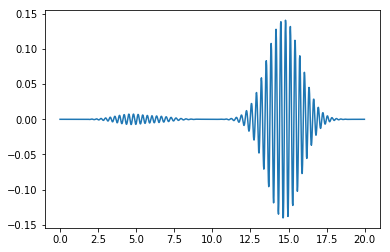

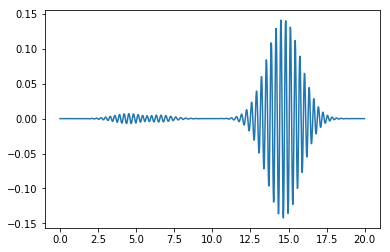

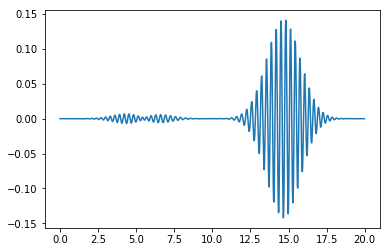

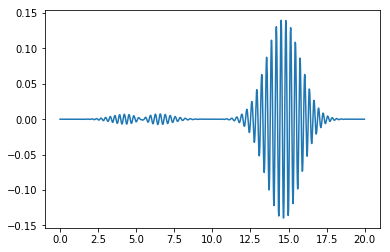

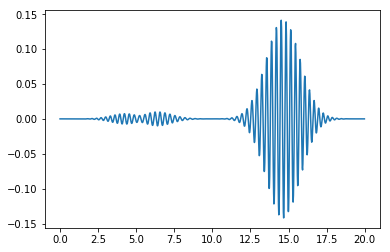

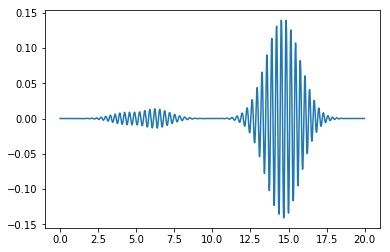

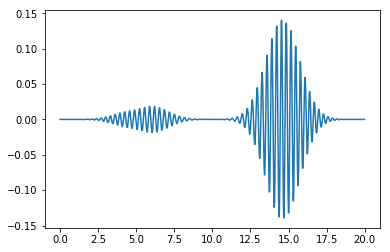

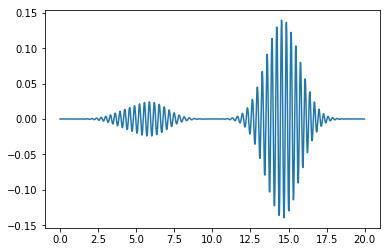

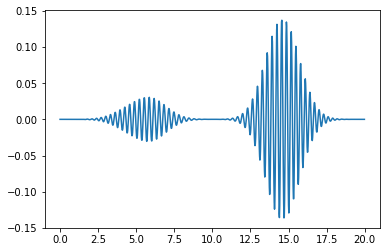

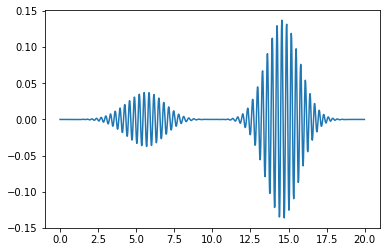

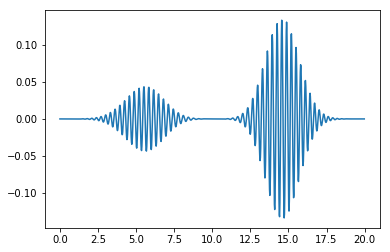

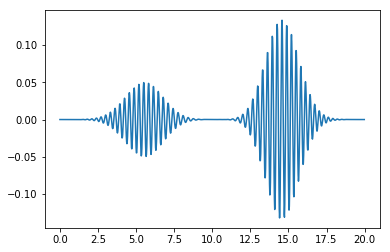

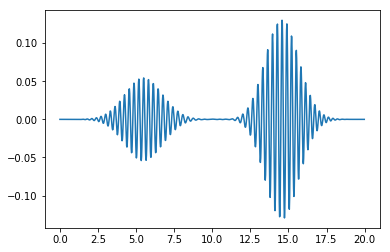

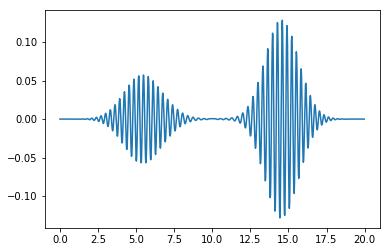

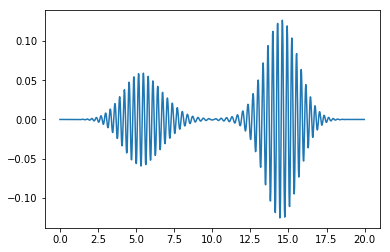

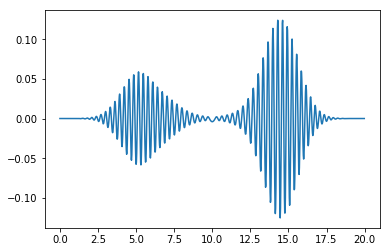

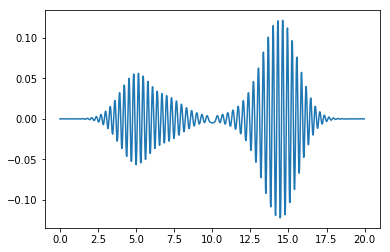

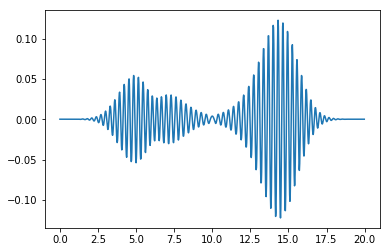

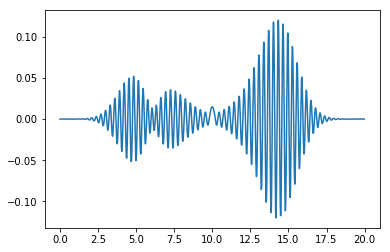

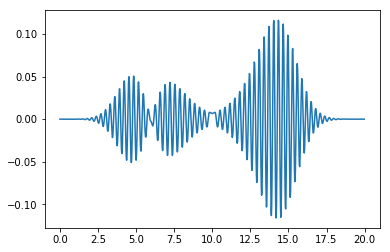

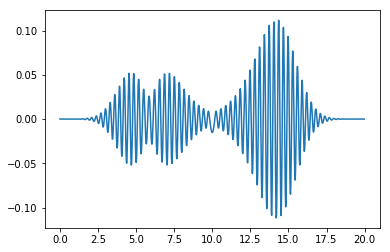

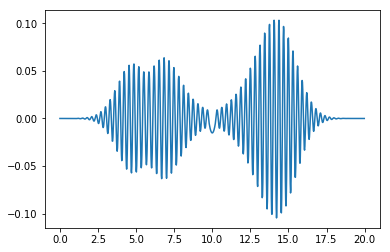

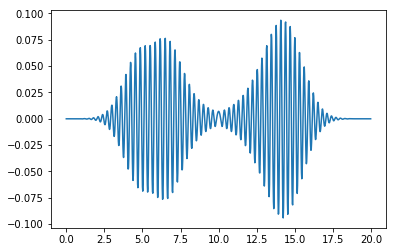

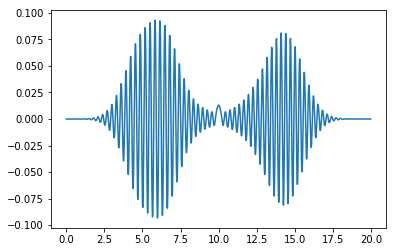

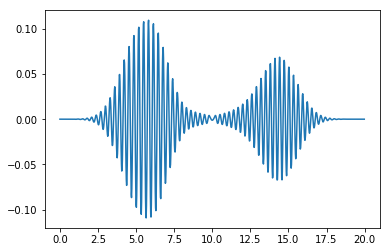

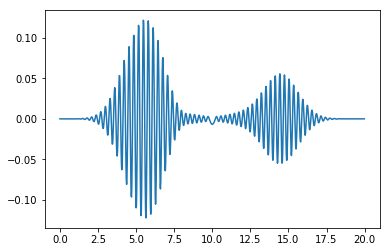

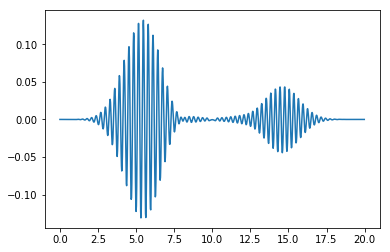

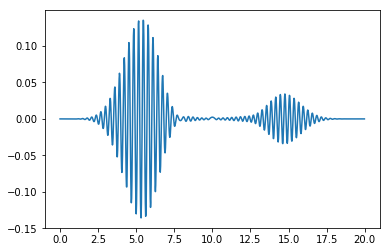

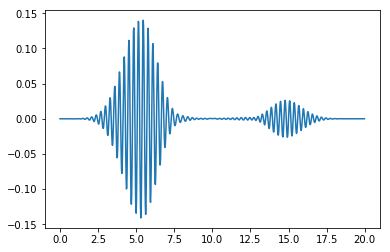

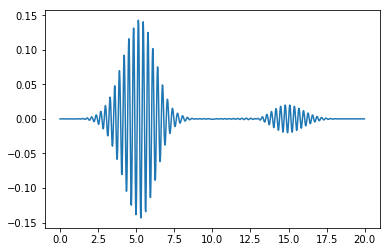

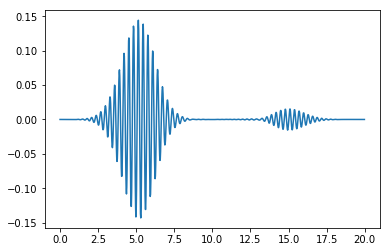

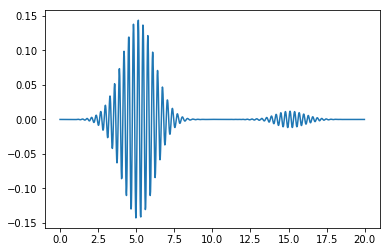

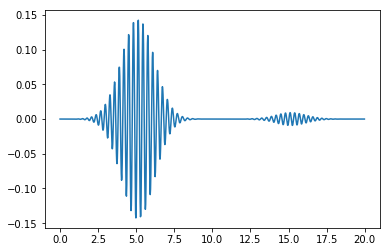

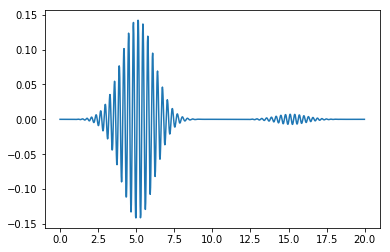

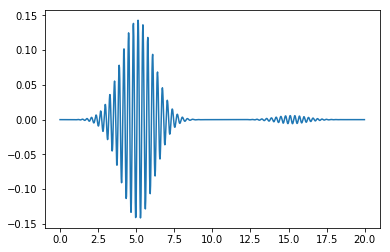

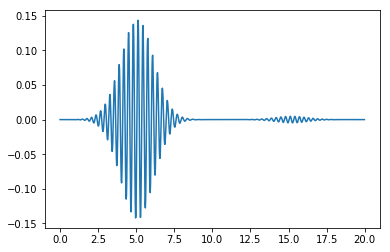

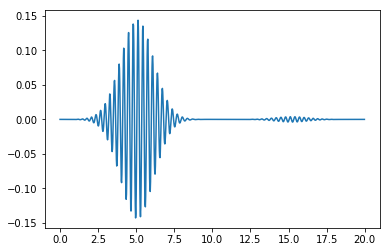

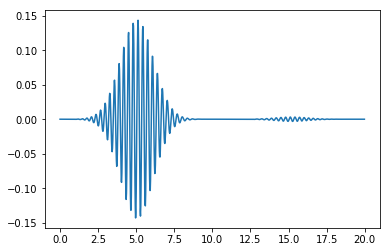

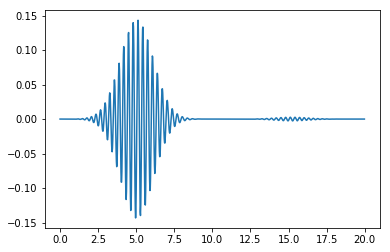

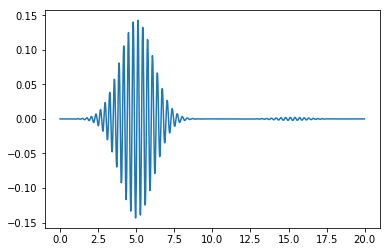

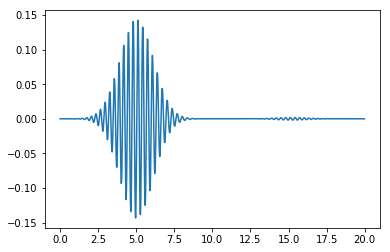

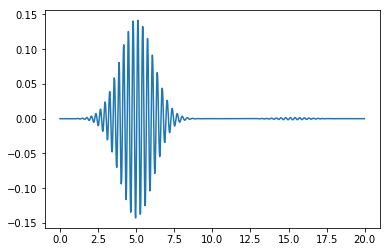

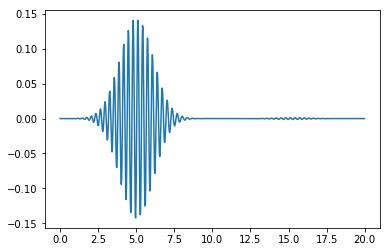

In [11]:
"Making a list of 50 different values of V0"
V0_list=np.linspace(0,(3*E)/2,50)

plt.plot(x,V3_arr)
plt.show()

for i in range(len(V0_list)):
    V3_arr= np.zeros(len(x)) #making an array of zeros
    for j in range(len(x)):
        V3_arr[j]=V3(j*delta_x,V0_list[i],l) #x=i*delta_x 
    psi_i, psi_r = propagate_psi(psi_i0,psi_r0,timesteps,V3_arr)
    plt.plot(x,psi_i)
    plt.show()

## problem 5

In [ ]:
"Making a list of 50 different values of L"
L_list=np.linspace(0,L/20,50)


## Kristine prøver å lage animasjon


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

sigma_x=2 #??
xs=5 #bare satte 5 fordi vi skal ha den verdien etterhvert
Nx= 1000
V=np.zeros(len(x)) 

#finding E and omega based on forumula in text
E=(h_bar*k_0)**2/(2*m)
omega=E/h_bar


#Function to calculate imaginary part of psi
def find_psi_im(x,t):
    psi_i=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_i[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.sin(k_0*x[1:-1]-omega*t)
    psi_i=psi_i/np.linalg.norm(psi_i) #normalizing
    return psi_i

#function to calculate real part of psi 
def find_psi_re(x,t):
    psi_r=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_r[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.cos(k_0*x[1:-1]-omega*t)
    psi_r=psi_r/np.linalg.norm(psi_r) #normalizing
    return psi_r
    

delta_t=0.00001
delta_x= L/(Nx)    
x=np.arange(0,L,delta_x)

#making arrays of initial values of psi_r(x,delta_t/2) and psi_i(x,0)
psi_i0=find_psi_im(x,0)
psi_r0=find_psi_re(x,delta_t/2)

def newPsi_im(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_i=np.zeros(len(psi_i))
    nextPsi_i[1:-1] = psi_i[1:-1] - delta_t *(V[1:-1]/h_bar*psi_r[1:-1] - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
    return nextPsi_i
                     
def newPsi_re(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_r=np.zeros(len(psi_r))
    nextPsi_r[1:-1] = psi_r[1:-1] + delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
    return nextPsi_r

def propagate_psi(psi_i,psi_r,timesteps,V):
    for i in range(timesteps):
        psi_i=newPsi_im(psi_i,psi_r,delta_x,delta_t, V)
        psi_r=newPsi_re(psi_i,psi_r,delta_x,delta_t, V)
    return psi_i, psi_r

for t in range(10):
    psii,psir=propagate_psi(psi_i0,psi_r0,10,V)
    #plt.plot(x,psii)
    #plt.show()

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( 0, 20))
ax.set_ylim((-0.15, 0.15))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
print("ok")


# animation function. This is called sequentially
def animate(i): #i endres hver gang... altså må i=antall timesteps i=framenumber.
    t=i
    psi_i,psi_r = propagate_psi(psi_i0,psi_r0,t,V)
    line.set_data(x, psi_i)
    print("yyo")
    return (line,)

def animatetest(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

#animtest = animation.FuncAnimation(fig, animatetest, init_func=init, frames=100000, interval=20, blit=True)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=10000, interval=20, blit=True)

rc('animation', html='html5')
